In [1]:
import pandas as pd
import os
%pylab inline
import json
from pandas.io.json import json_normalize
import altair as alt
#alt.renderers.enable('notebook', embed_options={'actions': True})

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tqdm import tqdm_notebook as tqdm

In [24]:
json_results = []
folder="../cal_new_training/"
for f in tqdm(os.listdir(folder)):
    json_results.append(json.load(open(folder+"/"+f)))

folder="../dt_2021_cal_results/json_files/"
for f in tqdm(os.listdir(folder)):
    json_results.append(json.load(open(folder+"/"+f)))

<ipython-input-24-167e99f8b2e0>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for f in tqdm(os.listdir(folder)):


In [35]:
df = pd.DataFrame(json_results)
df.columns=["horizon","method",2,3]
for i,feature in enumerate(["rmse","mae","bias","corr","crps","duration"]):
    df[feature]=df[2].apply(lambda e:e[feature])
df.drop([2,3],axis=1,inplace=True)

rf_knn = pd.DataFrame()
for i,feature in enumerate(["rmse","mae","bias","corr","crps","duration"]):
    dtemp=df[["horizon","method",feature]].copy()
    dtemp["value"]=dtemp[feature]
    dtemp["feature"]=feature
    rf_knn=pd.concat([rf_knn,dtemp[["horizon","method","value","feature"]]])

rf_knn.head()

,horizon,method,value,feature
0,53,QRF,16.507382,rmse
1,14,QRF,32.575191,rmse
2,9,QGB,14.562235,rmse
3,2,QGBL,9.748084,rmse
4,21,QGBL,16.048977,rmse


In [36]:
"""prev = pd.read_csv("xarima.csv",header=None)
prev.columns = ["horizon","value","feature"]
prev=prev[prev["horizon"]>0]
prev["method"]="Arima"
prev.head()"""


'prev = pd.read_csv("xarima.csv",header=None)\nprev.columns = ["horizon","value","feature"]\nprev=prev[prev["horizon"]>0]\nprev["method"]="Arima"\nprev.head()'

In [37]:
#all_df = pd.concat([rf_knn,prev],ignore_index=True)
all_df = pd.concat([rf_knn],ignore_index=True)

In [38]:
all_df["method"].unique()

array(['QRF', 'QGB', 'QGBL', 'NGBOOST', 'QLR', 'QKNN', 'MLP', 'QKNNL',
       'QRFL', 'DT'], dtype=object)

In [39]:
import seaborn as sns

In [47]:
#methods = [ 'QGB', 'QRF', 'QLR', 'QKNN', 'QRFL','QKNNL',]
methods = all_df["method"].unique()
current_palette = sns.color_palette().as_hex()[:len(methods)]
palette = dict(zip(methods,current_palette))

In [90]:
methods

array(['QRF', 'QGB', 'QGBL', 'NGBOOST', 'QLR', 'QKNN', 'MLP', 'QKNNL',
       'QRFL', 'DT'], dtype=object)

''

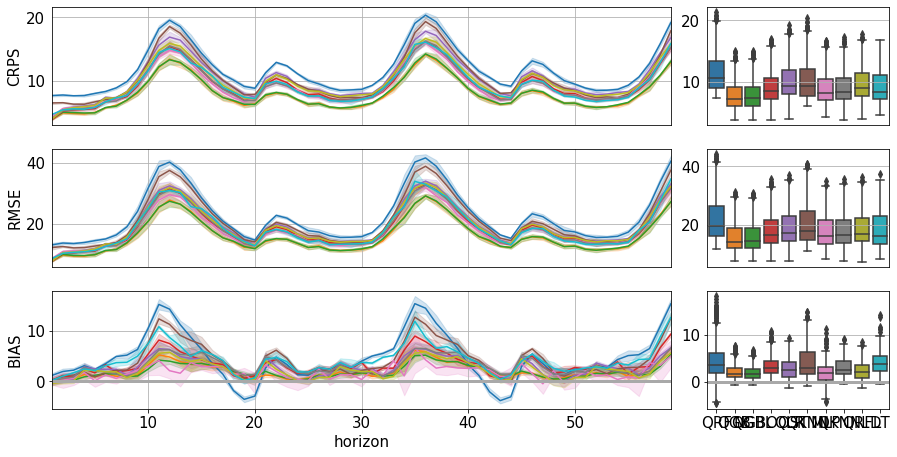

In [41]:
import seaborn as sns

all_df_o=all_df.copy()
choice = all_df["method"].unique()
#choice = ["QLR","GB","RF","KNN"]
#choice = ["QGB","QLR","QKNN","QRF"]
#choice = ["QGB","QLR","QKNNL","QRFL"]
#choice = ["GB","QGBL"]
#choice = ["QGB","QGBL","Arima"]
#choice = ["RFL","RF","QLR"]
#choice = ["QLR","RF"]
#choice = all_df["method"].unique()
all_dfg = all_df[all_df["method"].isin(choice)].copy()

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10))

#_____________________________________________

plt.subplot2grid((4, 4), (0, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="crps"])

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("CRPS")
plt.xlabel("")

plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (0, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="crps"],x="method",y="value",hue="method",palette=palette, 
            dodge=False,order=choice)

plt.gca().yaxis.grid(True)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (1, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="rmse"])

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("RMSE")
plt.xlabel("")

plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (1, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="rmse"],x="method",y="value",hue="method",palette=palette,
            order=choice, dodge=False)

plt.gca().yaxis.grid(True)

plt.tick_params(axis='both', left=False, bottom=False, labelbottom=False,)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

#_____________________________________________

plt.subplot2grid((4, 4), (2, 0), colspan=3)

sns.lineplot(x="horizon", y="value",hue="method",palette=palette, data=all_dfg[all_dfg["feature"]=="bias"])
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)
plt.gca().xaxis.grid(True)
plt.gca().axes.set_xlim(1, 59)

plt.ylabel("BIAS")
plt.xlabel("horizon")

plt.legend().set_visible(False)

#_____________________________________________


plt.subplot2grid((4, 4), (2, 3))

sns.boxplot(data=all_dfg[all_dfg["feature"]=="bias"],x="method",y="value",hue="method",palette=palette,order=choice
            , dodge=False)
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)

plt.ylabel("")
plt.xlabel("")
plt.legend().set_visible(False)

;

In [91]:
order_methods="""QRF
QRFL
QKNN
QKNNL
QGB
QGBL
QLR
MLP
NGBOOST
DT""".split("\n")

''

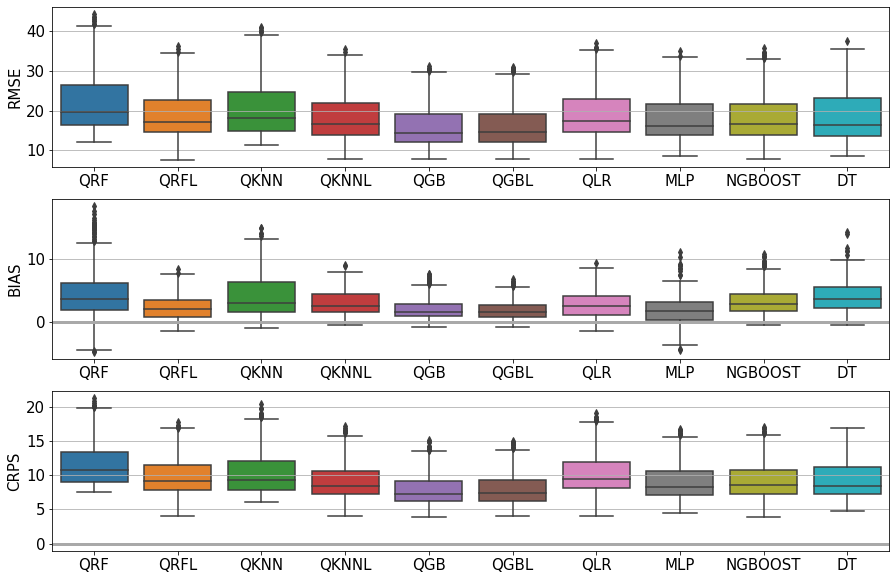

In [93]:
import seaborn as sns

#all_df_o=all_df.copy()
choice = all_df["method"].unique()
#choice = ["QLR","GB","RFL","KNN"]
#choice = ["GB","RFL","KNN","QLR"]
#choice = ["GB","Arima"]
#choice = ["GB","GBL"]
#choice = ["QRFL","QRF"]
#choice = ["QLR","RF"]
#choice = all_df["method"].unique()
all_dfg = all_df[all_df["method"].isin(choice)]

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10))


#_____________________________________________

plt.subplot2grid((3, 1), (0, 0))



sns.boxplot(data=all_dfg[all_dfg["feature"]=="rmse"],x="method",y="value",order=order_methods)

plt.gca().yaxis.grid(True)

plt.ylabel("RMSE")
plt.xlabel("")


#_____________________________________________


plt.subplot2grid((3, 1), (1, 0))



sns.boxplot(data=all_dfg[all_dfg["feature"]=="bias"],x="method",y="value",order=order_methods)
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)


plt.ylabel("BIAS")
plt.xlabel("")

#_____________________________________________


plt.subplot2grid((3, 1), (2, 0))



sns.boxplot(data=all_dfg[all_dfg["feature"]=="crps"],x="method",y="value",order=order_methods)
plt.axhline(y=0,color="darkgrey",linewidth=3)

plt.gca().yaxis.grid(True)


plt.ylabel("CRPS")
plt.xlabel("")

plt.savefig("error_graph.png")
;

In [45]:
pd.options.display.float_format = '{:,.2f}'.format

In [48]:
choice = all_df["method"].unique()
#choice = ["QLR","QGBL","QRFL","QKNNL","Arima"]
#choice = ["QLR","QGB","QRFL","QKNNL"]
#choice = ["RFL","RF"]
#choice = ["QLR","RFL"]
#choice = ["GB","Arima"]
t_df=all_df[all_df["method"].isin(choice)]
t_df = t_df[t_df["feature"]=="rmse"].copy()
# Aggregate to remove problems
t_df = t_df.groupby(["method","feature","horizon"]).mean().reset_index()
r = t_df[t_df["horizon"].isin([1,12,13,14,20,37,45,55])].pivot(index='horizon', columns='method', values='value')
#r = t_df[t_df["horizon"].isin([1,4,8])].pivot(index='horizon', columns='method', values='value')
r=pd.concat([r,t_df.groupby("method").mean().T.loc[["value"]]])

In [49]:
r

method,DT,MLP,NGBOOST,QGB,QGBL,QKNN,QKNNL,QLR,QRF,QRFL
1,8.83,8.87,7.91,8.03,8.08,12.35,8.22,8.07,13.23,7.99
12,30.92,29.54,31.48,27.86,27.45,37.51,31.21,32.45,40.23,31.90
13,30.31,28.83,30.02,26.46,26.51,35.42,30.12,31.24,37.71,30.80
14,25.68,25.93,27.20,24.18,23.84,31.80,27.24,28.32,33.38,27.75
20,12.94,13.64,13.10,12.12,11.96,14.17,13.01,13.46,14.79,13.24
37,30.83,29.23,31.06,27.33,27.54,36.50,31.17,32.45,38.90,31.93
45,17.21,17.64,17.94,15.05,15.02,18.65,17.64,18.84,20.14,18.53
55,14.05,14.43,14.25,12.62,12.82,15.10,14.37,15.25,17.36,14.99
value,18.66,18.16,18.52,16.09,16.14,20.73,18.43,19.44,22.62,19.12


In [32]:
print(r.to_latex())

\begin{tabular}{lrrrrrrrrr}
\toprule
method &   MLP &  NGBOOST &   QGB &  QGBL &  QKNN &  QKNNL &   QLR &   QRF &  QRFL \\
\midrule
1     &  4.58 &     4.05 &  4.10 &  4.15 &  6.61 &   4.15 &  4.21 &  7.77 &  4.14 \\
12    & 14.85 &    15.44 & 13.48 & 13.37 & 18.58 &  15.57 & 16.93 & 19.57 & 15.94 \\
13    & 14.43 &    14.81 & 12.85 & 12.98 & 17.55 &  15.00 & 16.45 & 18.58 & 15.52 \\
14    & 12.87 &    13.37 & 11.85 & 11.69 & 15.70 &  13.36 & 14.73 & 16.52 & 13.94 \\
20    &  7.31 &     7.06 &  6.46 &  6.37 &  7.94 &   6.98 &  7.50 &  8.90 &  7.24 \\
37    & 14.83 &    15.35 & 13.30 & 13.49 & 18.28 &  15.61 & 17.18 & 19.32 & 16.14 \\
45    &  9.65 &     9.81 &  8.14 &  8.11 & 10.15 &   9.49 & 10.70 & 11.61 & 10.26 \\
55    &  7.71 &     7.65 &  6.61 &  6.69 &  7.97 &   7.71 &  8.40 &  9.37 &  8.24 \\
value &  9.27 &     9.40 &  8.04 &  8.10 & 10.52 &   9.36 & 10.38 & 11.86 &  9.97 \\
\bottomrule
\end{tabular}



In [50]:
all_df.groupby("method").mean()

,horizon,value
method,,
DT,29.46,56.05
MLP,30.00,19.35
NGBOOST,30.00,37.72
QGB,30.00,13.49
QGBL,30.00,13.41
QKNN,30.00,9.68
QKNNL,29.90,8.65
QLR,30.00,9.53
QRF,30.00,13.42


In [53]:
all_df.head()

,horizon,method,value,feature
0,53,QRF,16.51,rmse
1,14,QRF,32.58,rmse
2,9,QGB,14.56,rmse
3,2,QGBL,9.75,rmse
4,21,QGBL,16.05,rmse


In [69]:
tmean = all_df.pivot_table(index="method",columns="feature",values="value",aggfunc="mean").reset_index()
tstd = all_df.pivot_table(index="method",columns="feature",values="value",aggfunc="std").reset_index()
# mean goes first
all_combined = tmean.merge(tstd,on="method")

In [88]:
all_combined["bias"]="$ underset{(" + all_combined["bias_y"].round(2).astype(str) + ")}{" + all_combined["bias_x"].round(2).astype(str) + "}"
all_combined["RMSE"]="$ underset{(" + all_combined["rmse_y"].round(2).astype(str) + ")}{" + all_combined["rmse_x"].round(2).astype(str) + "}"
all_combined["CRPS"]="$ underset{(" + all_combined["crps_y"].round(2).astype(str) + ")}{" + all_combined["crps_x"].round(2).astype(str) + "}"
all_combined["duration"]="$ underset{(" + all_combined["duration_y"].round(2).astype(str) + ")}{" + all_combined["duration_x"].round(2).astype(str) + "}"

all_combined[["method","CRPS","RMSE","bias","duration"]]

feature,method,CRPS,RMSE,bias,duration
0,DT,$ underset{(2.99)}{9.45},$ underset{(6.77)}{18.69},$ underset{(2.84)}{4.27},$ underset{(12.29)}{289.81}
1,MLP,$ underset{(2.85)}{9.27},$ underset{(6.04)}{18.16},$ underset{(2.49)}{1.86},$ underset{(7.71)}{73.08}
2,NGBOOST,$ underset{(2.96)}{9.4},$ underset{(6.43)}{18.52},$ underset{(2.32)}{3.42},$ underset{(14.2)}{180.86}
3,QGB,$ underset{(2.54)}{8.04},$ underset{(5.59)}{16.09},$ underset{(1.76)}{2.08},$ underset{(1.19)}{42.78}
4,QGBL,$ underset{(2.55)}{8.1},$ underset{(5.55)}{16.14},$ underset{(1.55)}{1.95},$ underset{(1.04)}{42.22}
5,QKNN,$ underset{(3.59)}{10.52},$ underset{(7.91)}{20.73},$ underset{(3.53)}{4.26},$ underset{(0.31)}{6.92}
6,QKNNL,$ underset{(2.99)}{9.34},$ underset{(6.44)}{18.4},$ underset{(2.01)}{3.06},$ underset{(0.32)}{7.06}
7,QLR,$ underset{(3.31)}{10.38},$ underset{(6.71)}{19.44},$ underset{(2.16)}{2.77},$ underset{(0.53)}{9.68}
8,QRF,$ underset{(3.58)}{11.86},$ underset{(8.37)}{22.62},$ underset{(4.77)}{4.68},$ underset{(1.01)}{24.15}
9,QRFL,$ underset{(3.03)}{9.97},$ underset{(6.52)}{19.12},$ underset{(2.0)}{2.32},$ underset{(0.36)}{8.71}


In [89]:
print(all_combined[["method","CRPS","RMSE","bias","duration"]].to_latex(index=None))

\begin{tabular}{lllll}
\toprule
  method &                       CRPS &                       RMSE &                      bias &                     duration \\
\midrule
      DT &   \$ underset\{(2.99)\}\{9.45\} &  \$ underset\{(6.77)\}\{18.69\} &  \$ underset\{(2.84)\}\{4.27\} &  \$ underset\{(12.29)\}\{289.81\} \\
     MLP &   \$ underset\{(2.85)\}\{9.27\} &  \$ underset\{(6.04)\}\{18.16\} &  \$ underset\{(2.49)\}\{1.86\} &    \$ underset\{(7.71)\}\{73.08\} \\
 NGBOOST &    \$ underset\{(2.96)\}\{9.4\} &  \$ underset\{(6.43)\}\{18.52\} &  \$ underset\{(2.32)\}\{3.42\} &   \$ underset\{(14.2)\}\{180.86\} \\
     QGB &   \$ underset\{(2.54)\}\{8.04\} &  \$ underset\{(5.59)\}\{16.09\} &  \$ underset\{(1.76)\}\{2.08\} &    \$ underset\{(1.19)\}\{42.78\} \\
    QGBL &    \$ underset\{(2.55)\}\{8.1\} &  \$ underset\{(5.55)\}\{16.14\} &  \$ underset\{(1.55)\}\{1.95\} &    \$ underset\{(1.04)\}\{42.22\} \\
    QKNN &  \$ underset\{(3.59)\}\{10.52\} &  \$ underset\{(7.91)\}\{20.73\} &  \$ un